
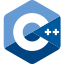
<br>

<div style="text-align:center; font-size:200%;">
 <b>Stack Unwinding</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 08 Stack Unwinding.ipynb -->
<!-- slides/module_180_error_handling/topic_140_stack_unwinding.cpp -->


# Stack-Unwinding

Wenn eine Exception ausgelöst wird, werden geschachtelte Funktionsaufrufe so
lange abgebrochen, bis ein passender Handler gefunden wird:

In [ ]:
#include <iostream>

In [ ]:
enum class ExceptionType
{
    no_error,
    logic_error,
    runtime_error,
};

In [ ]:
void throw_and_catch(ExceptionType exception_type)
{
    try {
        switch (exception_type) {
        case ExceptionType::logic_error:
            throw std::logic_error("std::logic_error");
        case ExceptionType::runtime_error:
            throw std::runtime_error("std::runtime_error");
        default:
            break;
        }
    }
    catch (const std::logic_error& error) {
    }
}

In [ ]:
void intermediate_fun(ExceptionType exception_type)
{
    throw_and_catch(exception_type);
}

In [ ]:
void outer_caller(ExceptionType exception_type)
{
    try {
        intermediate_fun(exception_type);
    }
    catch (const std::exception& error) {
    }
}

In [ ]:
void throw_and_catch(ExceptionType exception_type)
{
    std::cout << "      throw_and_catch() before try/catch\n";
    try {
        std::cout << "        throw_and_catch() before switch\n";
        switch (exception_type) {
        case ExceptionType::logic_error:
            std::cout << "          >>>>>>>> throwing std::logic_error\n";
            throw std::logic_error("std::logic_error");
        case ExceptionType::runtime_error:
            std::cout << "          >>>>>>>> throwing std::runtime_error\n";
            throw std::runtime_error("std::runtime_error");
        default: std::cout << "          not throwing exception\n";
        }
        std::cout << "        throw_and_catch() after switch\n";
    }
    catch (const std::logic_error& error) {
        std::cout << "        <<<<<<<< caught std::logic_error: " << error.what()
                  << "\n";
    }
    std::cout << "      throw_and_catch() after try/catch\n";
}

In [ ]:
void intermediate_fun(ExceptionType exception_type)
{
    std::cout << "    intermediate_fun() before call\n";
    throw_and_catch(exception_type);
    std::cout << "    intermediate_fun() after call\n";
}

In [ ]:
void outer_caller(ExceptionType exception_type)
{
    std::cout << "outer_caller() before try/catch\n";
    try {
        std::cout << "  outer_caller() before call\n";
        intermediate_fun(exception_type);
        std::cout << "  outer_caller() after call\n";
    }
    catch (const std::exception& error) {
        std::cout << "  <<<<<<<< caught std::exception: " << error.what() << "\n";
    }
    std::cout << "outer_caller() after try/catch\n";
}

In [ ]:
outer_caller(ExceptionType::no_error);

In [ ]:
outer_caller(ExceptionType::logic_error);

In [ ]:
outer_caller(ExceptionType::runtime_error);